## 1. Import Library and Functions

In [1]:
# import padndas for loading Data
import pandas as pd

# Importing Numpy for arrays
import numpy as np

# Importing Matplotlib
import matplotlib.pyplot as plt

# Import Sklearn for building Model
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

#scipy for some Statistics Calculations
from scipy.stats import pearsonr

## 2. Load Train and Test Data

In [2]:
# load Train Dara
train = pd.read_csv('train.csv')

#load Test Data
test = pd.read_csv('test.csv')

# How the data is displayed
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#get a descriptive Statistics for the Training Data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3. Exploratory Data Analysis

In [4]:
#Printing the unique values for Survived, Pclass, sex, SibSp, Parch and Embarked
print("\nSurvived values are:", train.Survived.unique())
print("\nPclass values are:", train.Pclass.unique())
print("\nSex values are:", train.Sex.unique())
print("\nSibSp values are:", train.SibSp.unique())
print("\nParch values are:", train.Parch.unique())
print("\nEmbarked values are:", train.Embarked.unique())
print('\nAge values are:', train.Age.unique())
print('\nFare values are:', train.Fare.unique())


Survived values are: [0 1]

Pclass values are: [3 1 2]

Sex values are: ['male' 'female']

SibSp values are: [1 0 3 4 2 5 8]

Parch values are: [0 1 2 5 3 4 6]

Embarked values are: ['S' 'C' 'Q' nan]

Age values are: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

Fare values are: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27

In [5]:
#Correlation between Fare and Pclass
corr, _ = pearsonr(train.Fare, train.Pclass)
print("Pearson correlation between Fare and Pclass: r ={:.3f}".format(corr))

Pearson correlation between Fare and Pclass: r =-0.549


In [6]:
#Correlation between SibSp and Parch
corr, _ = pearsonr(train.SibSp, train.Parch)
print("Pearson correlation between SibSp and Parch: r = {:.3f}".format(corr))

Pearson correlation between SibSp and Parch: r = 0.415


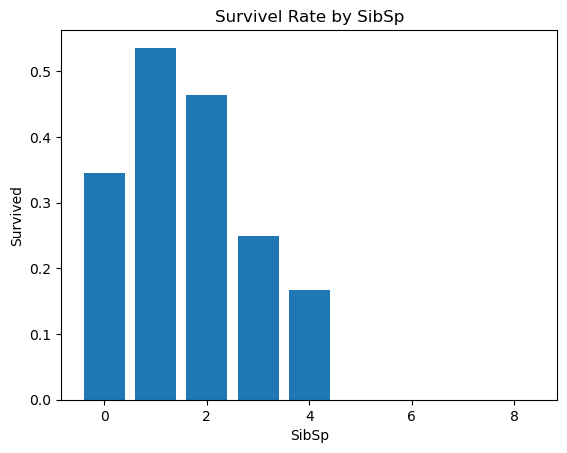


Pearson correlation between Parch and Survived: r = 0.082



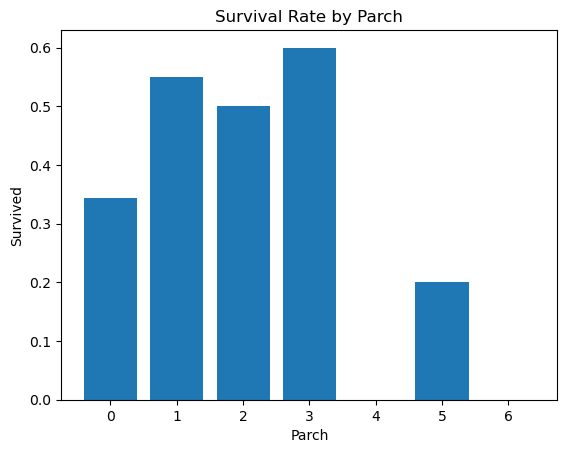

In [7]:
#Exploratory Data Analysis
#Get a list with the survival rates for each SibSp value; For loop that iterates up to the max value (8); add 1 to include 8
SibSp_surv = []
for i in range(train.SibSp.max() + 1):
    surv = train[train.SibSp == i]["Survived"]

    #check if the surv has values or not
    if len(surv) > 0:
        SibSp_surv.append(sum(surv) / len(surv))
    else:
        SibSp_surv.append(0)

#Visualization of the charts
plt.bar(range(train.SibSp.max()+1), SibSp_surv)
plt.xlabel("SibSp")
plt.ylabel("Survived")
plt.title("Survivel Rate by SibSp")
plt.show()

#correlation betwwen Parch and Survived
corr, _ = pearsonr(train.Parch, train.Survived)
print("\nPearson correlation between Parch and Survived: r = {:.3f}\n".format(corr))

#Get the list of survival rates for each Parch value, add 1 to include 6
Parch_surv = []
for i in range(train.Parch.max() + 1):
    surv = train[train.Parch == i]["Survived"]

    #Check if the correlation exists or not
    if len(surv) > 0:
        Parch_surv.append(sum(surv) / len(surv))
    else:
        Parch_surv.append(0)

#Visualization of the charts
plt.bar(range(train.Parch.max() + 1), Parch_surv)
plt.xlabel("Parch")
plt.ylabel("Survived")
plt.title("Survival Rate by Parch")
plt.show()

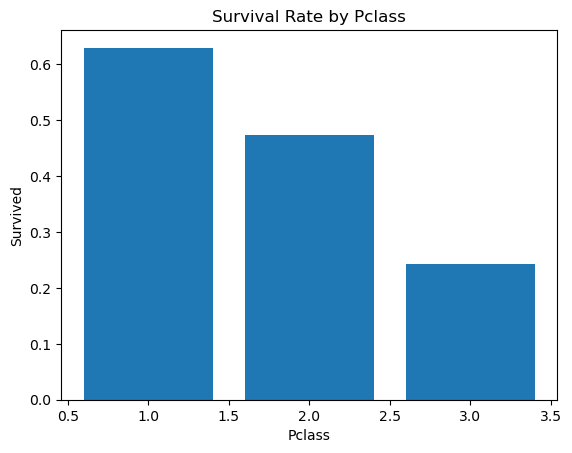

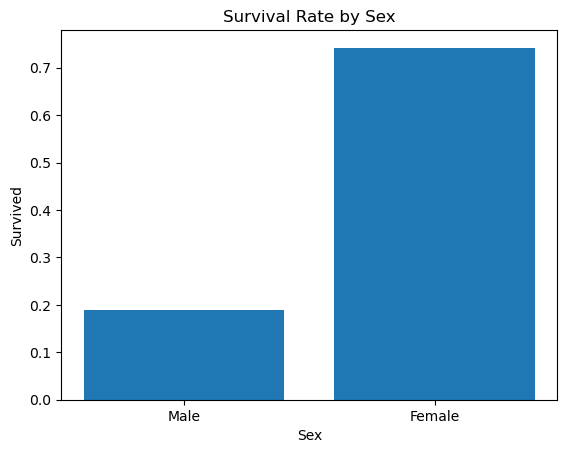

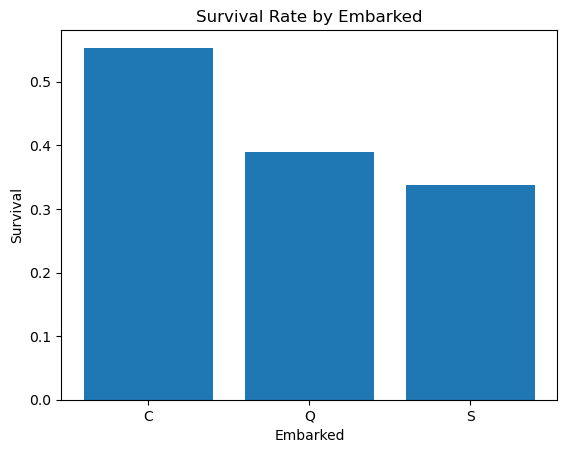

In [8]:
#Get a list of survival rates fr each Pclass value
Pclass_surv = []
for i in range(train.Pclass.max()):
    surv = train[train.Pclass == i + 1]["Survived"]

    # Validate whether the surv has values or not
    if len(surv) > 0:
        Pclass_surv.append(sum(surv) / len(surv))
    else:
        Pclass_surv.append(0)

#Visualizations Charts
plt.bar([1, 2, 3], Pclass_surv)
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.title("Survival Rate by Pclass")
plt.show()

# Get the list if Survival rates for each sex
men_surv = train[train.Sex == "male"]["Survived"]
men_surv_rate = sum(men_surv) / len(men_surv)
women_surv = train[train.Sex == 'female']['Survived']
women_surv_rate = sum(women_surv) /len(women_surv)

#visualization charts
plt.bar(['Male', 'Female'], [men_surv_rate, women_surv_rate])
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Survival Rate by Sex')
plt.show()

#Get a list of the survival rates for each Embarked Value
C_surv = train[train.Embarked == "C"]['Survived']
C_surv_rate = sum(C_surv) / len(C_surv)
Q_surv = train[train.Embarked == "Q"]['Survived']
Q_surv_rate = sum(Q_surv) / len(Q_surv)
S_surv = train[train.Embarked == "S"]['Survived']
S_surv_rate = sum(S_surv) / len(S_surv)

plt.bar(['C', 'Q', 'S'], [C_surv_rate, Q_surv_rate, S_surv_rate])
plt.xlabel('Embarked')
plt.ylabel('Survival')
plt.title('Survival Rate by Embarked')
plt.show()


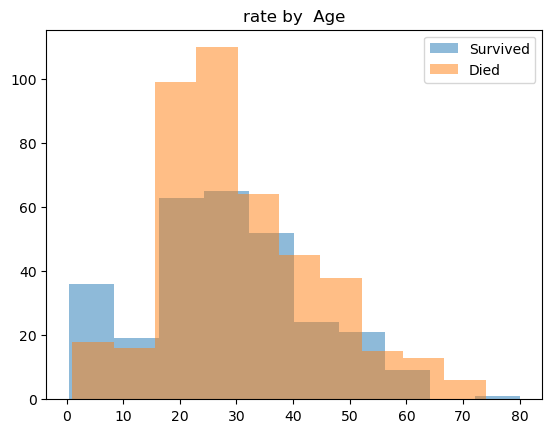

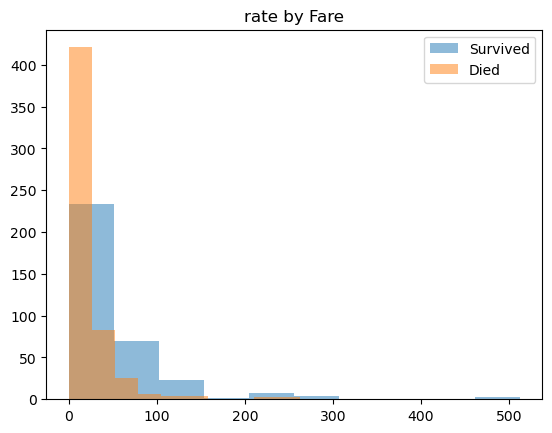

In [9]:
#Create separate dataframes for just those who survived, and those who did not survive

survived = train[train.Survived == 1]
died = train[train.Survived == 0]

# Plot histograms of Age and Fare with survived and died plot for comparision
plt.hist(survived.Age, alpha =0.5)
plt.hist(died.Age, alpha =0.5)
plt.legend(['Survived', 'Died'], loc='best')
plt.title('rate by  Age')
plt.show()
plt.hist(survived.Fare, alpha=0.5)
plt.hist(died.Fare, alpha=0.5)
plt.legend(['Survived', 'Died'], loc='best')
plt.title('rate by Fare')
plt.show()

4. Processing

The missing values for each column:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


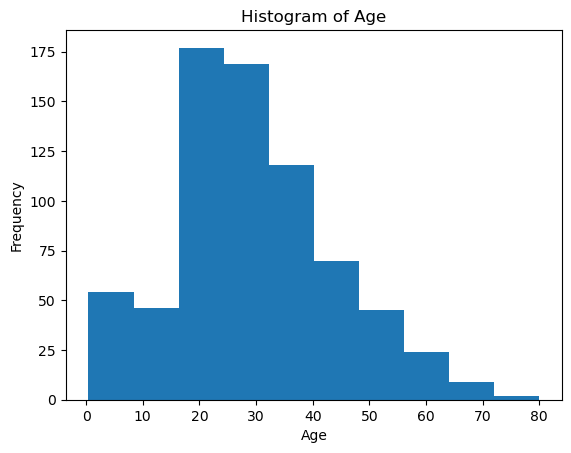


The number of missing values after the imputation is showh below:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [10]:
#Check the missing values
print("The missing values for each column:\n")
print(train.isnull().sum())

#Histogram of Age to see how to impute its missing values
plt.hist(train.Age)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title('Histogram of Age')
plt.show()

#Distribution of ages is skewed to the right. Impute with mode (most_frequent)
mode_imputer = SimpleImputer(strategy='most_frequent')

#Apply imputer on Age and Embarker cols
impute_cols = ['Age', 'Embarked']
train[impute_cols] = mode_imputer.fit_transform(train[impute_cols])

#Check for the missing values after the imputation
print('\nThe number of missing values after the imputation is showh below:\n')
print(train.isnull().sum())

#Create a copy of train data
X = train.copy()

#Select SibSp, Parch, Pclass and Age; new dataframe criation
features = ['SibSp', 'Fare', 'Parch', 'Pclass', 'Age']
X = X[features]

#Apply Label Encoder to Sex to transform it into 0s and 1s; insert back into X dataset
Sex_encoded = LabelEncoder().fit_transform(train.Sex)
X.insert(0, "Sex_encoded", Sex_encoded, True)

#Apply one-Hot enconding to Embarked; add back into X Dataset
Embarked = pd.get_dummies(train.Embarked)
X = X.join(Embarked)

#Isolate Survived from train data
y = train['Survived']

In [11]:
#Display X dataset
X.head()

,Sex_encoded,SibSp,Fare,Parch,Pclass,Age,C,Q,S
0,1,1,7.2500,0,3,22.0,0,0,1
1,0,1,71.2833,0,1,38.0,1,0,0
2,0,0,7.9250,0,3,26.0,0,0,1
3,0,1,53.1000,0,1,35.0,0,0,1
4,1,0,8.0500,0,3,35.0,0,0,1


In [20]:
# Preprocess the test data in the same way
#Check for missing values

print('\nThe number of missing values for each column is shown bellow:\n')
print(train.isnull().sum())

#Distribution of ages is skewed to the right
mode_imputer = SimpleImputer(strategy='most_frequent')

#Apply imputer on Age and Fare column
impute_cols = ['Age', 'Fare']
test[impute_cols] = mode_imputer.fit_transform(test[impute_cols])

#check for missing values after the imputation
print('\nThe number of missing values after the imputation are:\n')
print(test.isnull().sum())

#create a copy of train data
X_test = test.copy()

#select features Relatives, Pcclass, and Age; create new dataframe, X_test, to be used on the model
features = ['SibSp', 'Fare', 'Parch', 'Pclass', 'Age']
X_test = X_test[features]

#Apply label Encoder to Sex to transform it into 0s and 1s
Sex_encoded = LabelEncoder().fit_transform(test.Sex)
X_test.insert(0, 'Sex_encoded', Sex_encoded, True)

#Appply One-Hot encoding to Embarked
Embarked = pd.get_dummies(test.Embarked)
X_test = X_test.join(Embarked)


The number of missing values for each column is shown bellow:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

The number of missing values after the imputation are:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


c:\Users\Milton.Massuanganhe\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [21]:
#Display X_test dataset
X_test.head()

,Sex_encoded,SibSp,Fare,Parch,Pclass,Age,C,Q,S
0,1,0,7.8292,0,3,34.5,0,1,0
1,0,1,7.0000,0,3,47.0,0,0,1
2,1,0,9.6875,0,2,62.0,0,1,0
3,1,0,8.6625,0,3,27.0,0,0,1
4,0,1,12.2875,1,3,22.0,0,0,1


## Random Forest Model No Validation

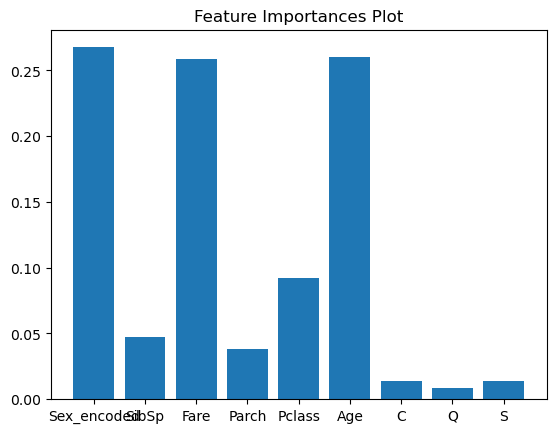

Your submission was sucessfully saved!


In [27]:
#model creation
model = RandomForestClassifier()
model.fit(X, y)

#Get Predictions on test Data
preds = model.predict(X_test)

#check the feature importance
plt.bar(x=X.columns, height=model.feature_importances_)
plt.title('Feature Importances Plot')
plt.show()

#save to CSV file
output = pd.DataFrame({'PassengerID': test.PassengerId, 'Survived': preds})
output.to_csv('submission_1.csv', index=False)
print('Your submission was sucessfully saved!')

## Improve on the Baseline Model

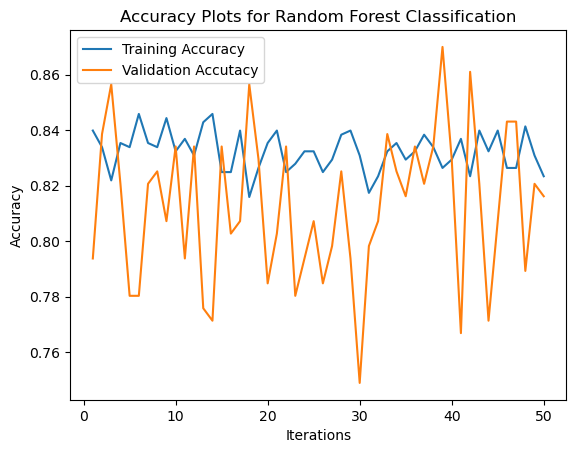

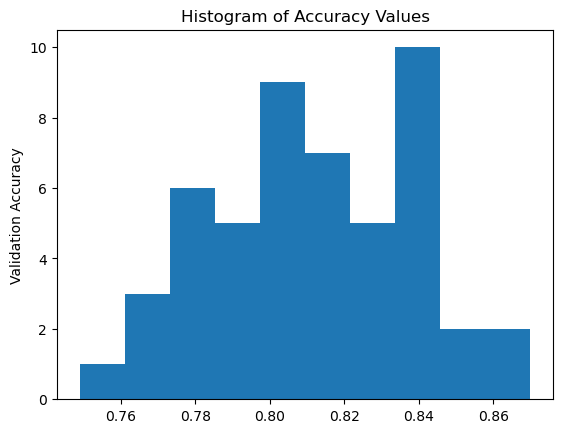

Mean Training Accuracy:  0.832

Mean Validation Accuracy:  0.813

Difference in means 0.02

Max Validation Accuracy:  0.87


In [57]:
# improve the baseline by tunning paramenters and using a simple train/ validation split
training_acc = []
valid_acc = []
iter = range(1, 51)

for i in iter:
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    rf = RandomForestClassifier(n_estimators=(100), max_depth=3)
    rf.fit(X_train, y_train)
    training_acc.append(rf.score(X_train, y_train))
    valid_acc.append(rf.score(X_valid, y_valid))

#Accutacy visualization
plt.plot(iter, training_acc, label='Training Accuracy')
plt.plot(iter, valid_acc, label='Validation Accutacy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy Plots for Random Forest Classification')
plt.legend()
plt.show()

plt.hist(valid_acc)
plt.ylabel('Validation Accuracy')
plt.title('Histogram of Accuracy Values')
plt.show()

print('Mean Training Accuracy: ', round(sum(training_acc)/ len(training_acc), 3))
print('\nMean Validation Accuracy: ', round(sum(valid_acc) / len(valid_acc), 3))
print('\nDifference in means', round(abs(sum(valid_acc) / len (valid_acc) - sum(training_acc) / len(training_acc)), 3))
print('\nMax Validation Accuracy: ', round(max(valid_acc), 3))

Your submission was saved successfully!


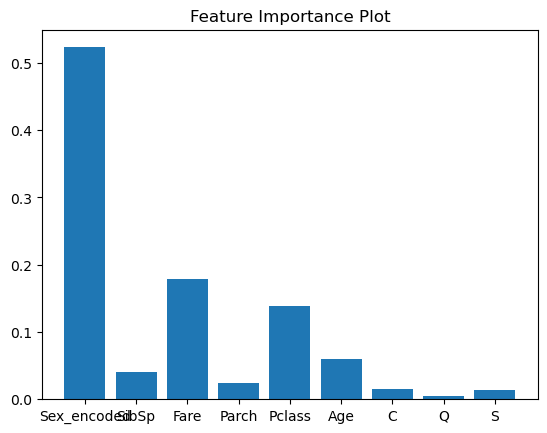

In [58]:
# Model Creation
model = RandomForestClassifier(n_estimators=100, max_depth=3)
model.fit(X, y)

#Get preditions on test Data
preds = model.predict(X_test)

#check feature importance
plt.bar(x=X.columns, height=model.feature_importances_)
plt.title('Feature Importance Plot')
plt.show

#save CSV file
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': preds})
output.to_csv('submission.csv', index=False)
print('Your submission was saved successfully!')

## Additional Models

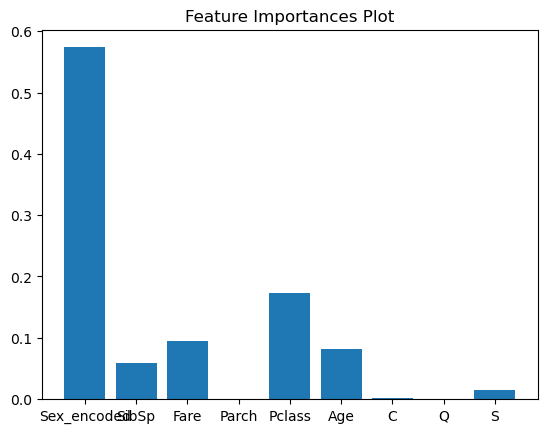

Your submission was successfully saved!


In [45]:
model = GradientBoostingClassifier(n_estimators=80, max_depth=3, learning_rate=0.03)
model.fit(X, y)

#get predictions
preds = model.predict(X_test)

#check feature importance
plt.bar(x=X.columns, height=model.feature_importances_)
plt.title('Feature Importances Plot')
plt.show()

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': preds})
output.to_csv('submission.csv', index=False)
print('Your submission was successfully saved!')

In [56]:
# Columns  to  try model with different features selected
columns = ['Sex_encoded', 'SibSp', 'Fare', 'Pclass', 'Age']

#Create a copy of X and X_test with the selected columns
X_new = X[columns]
X_test_new = X_test[columns]

#Instantiate Scaler Object and fit /transform X_new
scaler = MinMaxScaler()
scaler.fit(X_new)
X_scaled = scaler.transform(X_new)

#X_Scaled is a numpy array without original columns headers; convert to pandas df and return columns headers
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X_new.columns

#Repeat for X_tes_new and use scaler that was fit on X_new
X_test_scaled = pd.DataFrame(scaler.transform(X_test_new))
X_test_scaled.columns = X_test_new.columns


#Look at X_scalled and X_test_scalled data
print('\nX_Scaled data\n')
print(X_scaled.head())
print('\nX_test_Scaled data\n')
print(X_test_scaled.head())


X_Scaled data

   Sex_encoded  SibSp      Fare  Pclass       Age
0          1.0  0.125  0.014151     1.0  0.271174
1          0.0  0.125  0.139136     0.0  0.472229
2          0.0  0.000  0.015469     1.0  0.321438
3          0.0  0.125  0.103644     0.0  0.434531
4          1.0  0.000  0.015713     1.0  0.434531

X_test_Scaled data

   Sex_encoded  SibSp      Fare  Pclass       Age
0          1.0  0.000  0.015282     1.0  0.428248
1          0.0  0.125  0.013663     1.0  0.585323
2          1.0  0.000  0.018909     0.5  0.773813
3          1.0  0.000  0.016908     1.0  0.334004
4          0.0  0.125  0.023984     1.0  0.271174


In [63]:
#tune the model with this scaled data
training_acc = []
valid_acc = []
iter = range(1, 101)

for i in iter:
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)
    gbrt = GradientBoostingClassifier(n_estimators=60, max_depth=3, learning_rate=0.1)
    gbrt.fit(X_train, y_train)
    training_acc.append(gbrt.score(X_train, y_train))
    valid_acc.append(gbrt.score(X_train, y_train))

# visualization
plt.plot(iter, training_acc, label='Training Accuracy')
plt.plot(iter, valid_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy Plots for Gradient Boosting Classification')
plt.legend()
plt.show()

# Chart for validation Accuracy
plt.bar(valid_acc)
plt.ylabel('Validation Accuracy')
plt.title('Histogram of Accuracy Values')
plt.show()


#Check the means

ValueError: With n_samples=1, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [46]:
submission = pd.read_csv('submission_2.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()

In [ ]:
submission = pd.read_csv('submission_1.csv')
submission.head()

In [ ]:
submission = pd.read_csv('gender_submission_Kallge.csv')
submission.head()